In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
df = pd.read_csv('kyphosis.csv')

In [11]:
df.head()

,Unnamed: 0,Kyphosis,Age,Number,Start
0,1,absent,71,3,5
1,2,absent,158,3,14
2,3,present,128,4,5
3,4,absent,2,5,1
4,5,absent,1,4,15


In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  81 non-null     int64 
 1   Kyphosis    81 non-null     object
 2   Age         81 non-null     int64 
 3   Number      81 non-null     int64 
 4   Start       81 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 3.3+ KB


<Figure size 3600x2400 with 0 Axes>

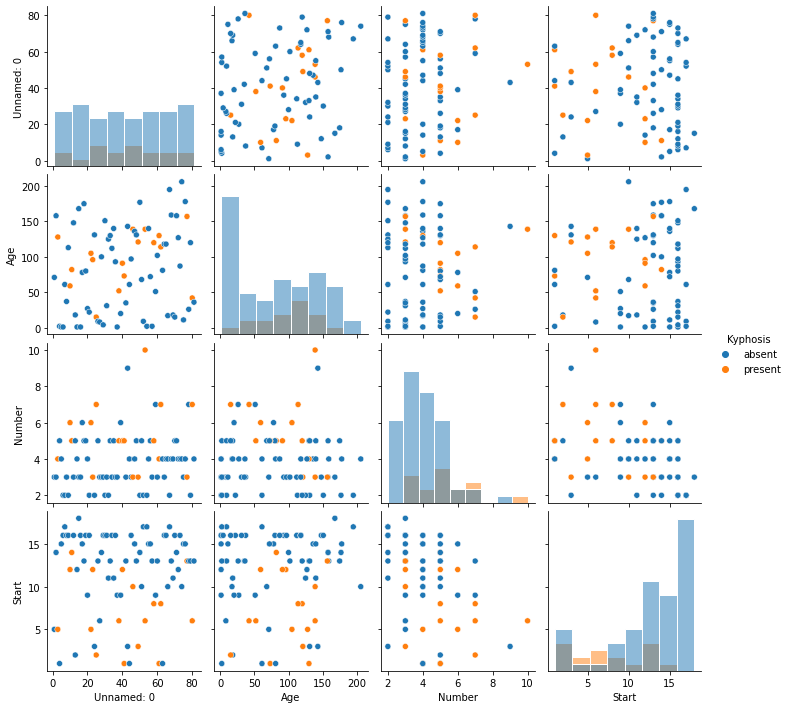

In [13]:
fig = plt.figure(dpi=600)
sns.pairplot(df, hue='Kyphosis', diag_kind='hist',
            diag_kws={'edgecolor':'w'})

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = df.drop('Kyphosis', axis=1)

In [16]:
y = df['Kyphosis']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
 dtree = DecisionTreeClassifier()

In [20]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [21]:
predictions = dtree.predict(X_test)

In [22]:
from sklearn.metrics import classification_report,confusion_matrix

In [23]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[21  2]
 [ 8  2]]


              precision    recall  f1-score   support

      absent       0.72      0.91      0.81        23
     present       0.50      0.20      0.29        10

    accuracy                           0.70        33
   macro avg       0.61      0.56      0.55        33
weighted avg       0.66      0.70      0.65        33



In [24]:
from sklearn.metrics import classification_report,confusion_matrix

In [25]:
import sklearn.metrics as metrics

In [26]:
y_pred = dtree.predict(X_test)
accuracy = metrics.accuracy_score(y_test,y_pred)
print('Accuracy Score:',accuracy )

Accuracy Score: 0.696969696969697


In [27]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

[Text(0.5416666666666666, 0.875, 'X[2] <= 4.5\ngini = 0.249\nsamples = 48\nvalue = [41, 7]'),
 Text(0.3333333333333333, 0.625, 'X[0] <= 76.5\ngini = 0.114\nsamples = 33\nvalue = [31, 2]'),
 Text(0.16666666666666666, 0.375, 'X[3] <= 2.0\ngini = 0.062\nsamples = 31\nvalue = [30, 1]'),
 Text(0.08333333333333333, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.25, 0.125, 'gini = 0.0\nsamples = 28\nvalue = [28, 0]'),
 Text(0.5, 0.375, 'X[2] <= 2.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.4166666666666667, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.5833333333333334, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.75, 0.625, 'X[0] <= 12.0\ngini = 0.444\nsamples = 15\nvalue = [10, 5]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8333333333333334, 0.375, 'X[3] <= 1.5\ngini = 0.355\nsamples = 13\nvalue = [10, 3]'),
 Text(0.75, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.9166666666666666, 0

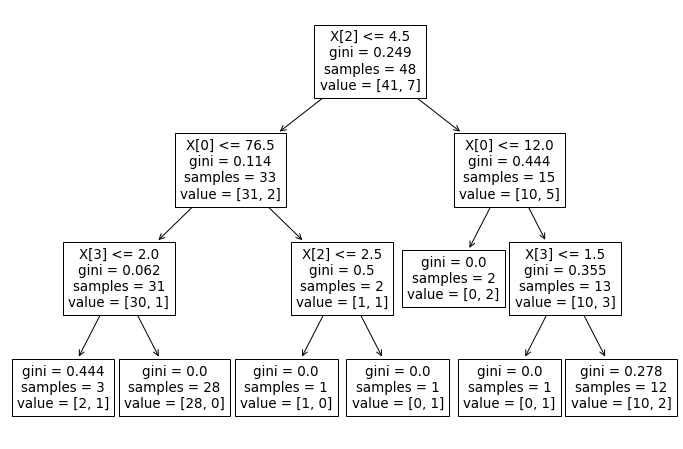

In [28]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train))